In [1]:
from midi_utils import get_notes, prepare_sequences, create_midi
import matplotlib.pyplot as plt

In [2]:
from model import MusicVAE
from torch import optim

In [3]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Load midi data and EDA

In [4]:
notes = get_notes("midi_songs")
notes

93


['2.3.7.10',
 '10.2',
 '7.10.0.3',
 '10.2',
 '5.9',
 '10.2',
 '3.7',
 'D4',
 '3.7',
 '10.2',
 '0.3.7',
 '10',
 '10.2',
 '5.9',
 '10.2',
 '6.9.11.2',
 'D5',
 '4.7.9.0',
 '11.0.4.7',
 'F#5',
 'E5',
 'D5',
 'B4',
 '6.9.11.2',
 'D5',
 '0.4.7',
 '11.0.4.7',
 '6.7.11.2',
 '8.11',
 '3.6',
 '8.11',
 'E-4',
 'B3',
 '8.11.3',
 'F#4',
 '8.11.3',
 '4.6.9.11',
 '1',
 '11',
 '9.11.1.4',
 'C#4',
 '9.11.1.4',
 '8.11.1.4',
 '1',
 '7.10.0.3',
 'C#4',
 'B1',
 '2.6.9',
 '4',
 'C#4',
 '11',
 'B1',
 '2.6.9',
 'C#4',
 'D2',
 '6.9.1',
 'C#4',
 'C#4',
 '9',
 '4.6.9.11',
 '1',
 '11',
 '9.11.1.4',
 'C#4',
 '9.11.1.4',
 '8.11.1.4',
 '1',
 '7.10.0.3',
 'C#4',
 'B1',
 '2.6.9',
 '4',
 'C#4',
 '6',
 'B1',
 '2.6.9',
 'C#4',
 'D2',
 '6.9.1',
 '1.4',
 '9.1',
 '11.4',
 '7',
 'F#4',
 'G3',
 'D5',
 'B5',
 '11.0',
 '9.2',
 '7.11.2',
 'B5',
 'F#4',
 '7.11.2',
 '7.0',
 '9.0',
 '0.4.7',
 '7',
 '7.0',
 'F#4',
 '11.2',
 'B5',
 '7.0',
 '0.2',
 '7.9',
 'C4',
 'D5',
 'B3',
 'F#4',
 '9.2',
 'B5',
 '7.0',
 'G5',
 '11.4',
 '7',
 'F#4'

In [5]:
pitchnames = sorted(set(item for item in notes))
pitchnames

['0.1.3.5.8',
 '0.1.5.8',
 '0.2',
 '0.2.3.5.7',
 '0.2.3.7',
 '0.2.4',
 '0.2.4.7',
 '0.2.4.7.9',
 '0.2.5',
 '0.3',
 '0.3.5',
 '0.3.5.7',
 '0.3.5.7.8',
 '0.3.5.8',
 '0.3.7',
 '0.4',
 '0.4.7',
 '0.5',
 '1',
 '1.2',
 '1.2.4.6.9',
 '1.2.6',
 '1.2.6.9',
 '1.3.4.8',
 '1.3.5',
 '1.3.8',
 '1.4',
 '1.4.6.8.9',
 '1.4.6.9',
 '1.4.8',
 '1.5.8',
 '1.6',
 '1.7',
 '10',
 '10.0',
 '10.0.1.5',
 '10.0.2.5',
 '10.0.2.5.7',
 '10.0.3',
 '10.0.5',
 '10.1',
 '10.1.3.5.6',
 '10.1.3.6',
 '10.1.5',
 '10.11.3.6',
 '10.2',
 '10.2.5',
 '11',
 '11.0',
 '11.0.4.7',
 '11.1',
 '11.1.2.6',
 '11.1.3.6',
 '11.1.4.7',
 '11.2',
 '11.2.4',
 '11.2.4.6.7',
 '11.2.4.7',
 '11.2.6',
 '11.3',
 '11.3.5',
 '11.3.6',
 '11.4',
 '2',
 '2.3.5.7.10',
 '2.3.7',
 '2.3.7.10',
 '2.4',
 '2.4.5.9',
 '2.4.6',
 '2.4.6.7',
 '2.4.7.10',
 '2.4.7.9',
 '2.5',
 '2.5.7',
 '2.5.7.10',
 '2.5.7.9',
 '2.5.7.9.10',
 '2.5.9',
 '2.6',
 '2.6.7',
 '2.6.9',
 '2.7',
 '2.8',
 '3',
 '3.4',
 '3.4.6.8',
 '3.4.8.10.11',
 '3.4.8.11',
 '3.5',
 '3.5.10',
 '3.5.7',
 '3.5.

In [6]:
n_vocab = len(set(notes))
n_vocab

254

In [7]:
network_input, idx_to_note = prepare_sequences(notes, pitchnames, n_vocab)

[[66, 45, 150, 45, 125, 45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225], [45, 150, 45, 125, 45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225, 202], [150, 45, 125, 45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225, 202, 171], [45, 125, 45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225, 202, 171, 234], [125, 45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225, 202, 171, 234, 171], [45, 97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 93, 168, 225, 202, 171, 234, 171, 105], [97, 220, 97, 45, 14, 33, 45, 125, 45, 144, 221, 109, 49, 235, 230, 221, 203, 144, 221, 16, 49, 135, 168, 

In [8]:
network_input.shape

(1868, 32, 256)

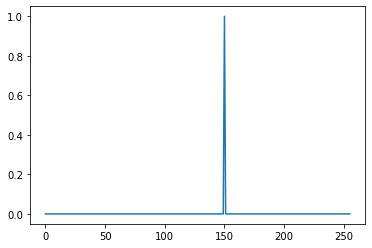

In [9]:
plt.plot(network_input[1, 1, :])

In [10]:
network_input = torch.Tensor(network_input)

In [11]:
# max_beta=1.0,  # Maximum KL cost weight, or cost if not annealing.
# beta_rate=0.0,  # Exponential rate at which to anneal KL cost.

In [12]:
# beta = ((1.0 - torch.pow(beta_rate, (self.global_step.float())))
#             * max_beta)

# Training

In [13]:
model = MusicVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-3)

total_loss = []
epochs = 100
batch_size = 128
step_size = len(network_input) // batch_size

for epoch in range(epochs):
    losses = []
    optimizer.zero_grad()
    output, loss = model.forward(
        network_input.to(device), step_size=step_size, verbose=1
    )

    losses.append(loss)
    loss.backward()
    optimizer.step()

    avg_loss = torch.mean(torch.Tensor(losses))
    print(f"Epoch: {epoch}, Loss: {avg_loss}")
    total_loss.append(avg_loss)
    # if avg_loss > torch.mean(torch.Tensor(total_loss[-2:])):
    #     break

/Users/camus/Library/Mobile Documents/com~apple~CloudDocs/Downloads/MusicVAE/Learning-Music-Variational-AutoEncoder/model.py:125: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(out)


recon_loss = tensor(0.0266, grad_fn=<BinaryCrossEntropyBackward0>), kl_loss = tensor(0.0002, grad_fn=<MulBackward0>)
Epoch: 0, Loss: 0.26638543605804443


KeyboardInterrupt: 

In [ ]:
plt.plot(total_loss)

# Sampling

In [ ]:
model.initialize_sampler()
sampler = model.sample()

In [ ]:
sample = []
for _ in range(256):
    sample += [idx_to_note[torch.argmax(sampler.sample()).item()]]

In [ ]:
print(sample)

In [ ]:
output_path = "/sample.mid"

In [ ]:
create_midi(sample, output_path=output_path, offset_step=1.0)